In [7]:
import numpy as np
import gudhi
import mdtraj as md
from pylab import *
from math import pi
import MDAnalysis as mda
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import spectral_clustering
import random

In [8]:
h0matrix = np.load('bottleneck_selectedH0.npy', allow_pickle=True)

In [9]:
h1matrix = np.load('bottleneck_selectedH1.npy', allow_pickle=True)

In [10]:
rmsd = np.load('BottleneckRMSD.npy', allow_pickle=True)

In [11]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
# Example: Create a random distance matrix
distance_matrix = h1matrix
# Convert distance matrix to similarity matrix
gamma = 1.0 / (2.0 * np.mean(distance_matrix)**2)
similarity_matrix = np.exp(-gamma * distance_matrix**2)
# Compute the normalized Laplacian
degree_matrix = np.diag(similarity_matrix.sum(axis=1))
L_norm = np.identity(200) - np.linalg.inv(degree_matrix)**0.5 @ similarity_matrix @ np.linalg.inv(degree_matrix)**0.5
# Compute eigenvalues
eigenvalues, _ = eigh(L_norm)
eigenvalues = np.sort(eigenvalues)
# Find the eigen gap
eigen_gaps = np.diff(eigenvalues)
max_gap_index = np.argmax(eigen_gaps)
print("Eigenvalues:", eigenvalues)
print("Max gap index:", max_gap_index)
print("Eigen gap:", eigen_gaps[max_gap_index])

Eigenvalues: [-1.12296903  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.        

In [12]:
from sklearn.cluster import SpectralClustering
clustering1 = SpectralClustering(n_clusters=2, gamma=1).fit(h1matrix)

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [13]:
from sklearn.cluster import SpectralClustering
clustering2 = SpectralClustering(n_clusters=2, gamma=1).fit(h0matrix)

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [15]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [16]:
c1x_values = list(range(200))
c1y_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0]
#H0

In [17]:
c2x_values = list(range(200))
c2y_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0]
#H1

In [18]:
my_dict = {i: [i] for i in range(len(c2y_values))}
keys_list = list(my_dict.keys())
random_keys = random.sample(keys_list, 10)
print(random_keys)

[97, 84, 164, 94, 124, 35, 32, 27, 25, 169]


In [2]:
traj3 = md.load('bottleneck_selected_trajectory.pdb')
traj3 = md.Trajectory.superpose(traj3, traj3[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [ ]:
frame = traj3[107]
frame.save("frame107.pdb")

In [ ]:
from Bio import PDB

frames = ["frame006.pdb", "frame008.pdb", "frame009.pdb", "frame034.pdb", "frame100.pdb","frame107.pdb", "frame131.pdb","frame163.pdb", "frame174.pdb", "frame188.pdb"]

# Create a list to store models for each frame
all_models = []

# Load each frame and store its models in the list
for i, frame in enumerate(frames):
    structure = PDB.PDBParser(QUIET=True).get_structure(f"frame_{i+1}", frame)
    models = list(structure.get_models())
    all_models.extend(models)

# Create a new structure with 10 models
combined_structure = PDB.Structure.Structure("combined")

# Assign each model to the corresponding model in the combined structure
model_counter = 1
for i, model in enumerate(all_models):
    new_model = PDB.Model.Model(model_counter)
    for chain in model.get_chains():
        new_model.add(chain.copy())
    combined_structure.add(new_model)
    model_counter += 1

# Create a PDBIO object to write the combined structure
pdbio = PDB.PDBIO()

# Save the combined structure to a new PDB file
pdbio.set_structure(combined_structure)
pdbio.save("combined_random.pdb")

In [19]:
th0matrix = h0matrix + h0matrix.T
th1matrix = h1matrix + h1matrix.T

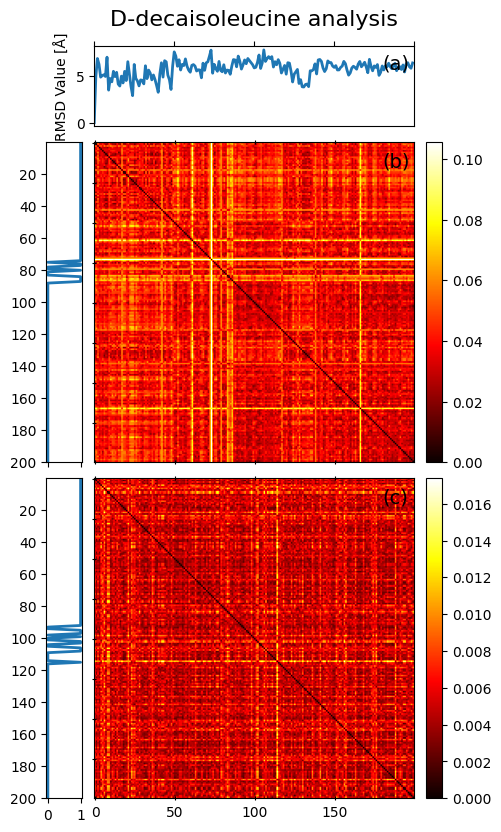

In [35]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([0, 0, 0.4, 0.4])
ax2 = fig.add_axes([0, 0.42, 0.4, 0.4])
cbar_ax1 = fig.add_axes([ax1.get_position().x1+0.015, ax1.get_position().y0, 0.02, ax1.get_position().height])
cbar_ax2 = fig.add_axes([ax2.get_position().x1+0.015, ax2.get_position().y0, 0.02, ax2.get_position().height])
rmsd_ax = fig.add_axes([ax2.get_position().x0, ax2.get_position().y1+0.02, ax2.get_position().width, 0.1])
c1_ax = fig.add_axes([-0.06, 0, 0.045, 0.4])
c2_ax = fig.add_axes([-0.06, 0.42, 0.045, 0.4])

ax1.tick_params(direction='inout', labelbottom=True, labelleft=False, top=True, bottom=True)
ax2.tick_params(direction='inout', labelbottom=False, labelleft=False, top=True, bottom=True)
cbar_ax1.tick_params(left=False, labelleft=False, right=True, labelright=True, labelbottom=False)
cbar_ax2.tick_params(left=False, labelleft=False, right=True, labelright=True, labelbottom=False)
rmsd_ax.tick_params(bottom=False, labelbottom=False, top=True, labeltop=False)
c1_ax.tick_params(left= True, labelleft= True, right=False, labelright=False, labelbottom=True)
c2_ax.tick_params(left= True, labelleft= True, right=False, labelright=False, labelbottom=False)

rmsd_ax.annotate(text='(a)', xy=(0.90, 0.91), xycoords='axes fraction', ha='left', va='top', fontsize=14)
ax2.annotate(text='(b)', xy=(0.90, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize=14)
ax1.annotate(text='(c)', xy=(0.90, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize=14)

c1_ax.plot(c1y_values, c1x_values[::-1], linestyle='-', lw=2)
c1_ax.set_yticks(range(0, 200, 20))
c1_ax.set_yticklabels(range(200, 0, -20))
c1_ax.set_ylim(0,200)
custom_xticks = [0, 1]
c1_ax.set_xticks(custom_xticks)
c1_ax.set_xticklabels(custom_xticks)
c2_ax.plot(c2y_values, c2x_values[::-1], linestyle='-', lw=2)
c2_ax.set_yticks(range(0, 200, 20))
c2_ax.set_yticklabels(range(200, 0, -20))
c2_ax.set_ylim(0,200)

rmsd_ax.set_ylabel('RMSD Value [Å]', fontsize = 10)
rmsd_ax.set_xlim(0,200)
rmsd_ax.plot(rmsd, marker='o', markersize=0, linestyle='-', lw=2)
im1 = ax1.imshow(th0matrix, cmap='hot')
im2 = ax2.imshow(th1matrix, cmap='hot')
colorbar1 = fig.colorbar(im1, cax=cbar_ax1)
colorbar2 = fig.colorbar(im2, cax=cbar_ax2)

rmsd_ax.set_title('D-decaisoleucine analysis', y=1, pad=15, fontsize=16)
plt.savefig('D-decaisoleucine analysis', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
traj2 = md.load('combined200.pdb')
traj2 = md.Trajectory.superpose(traj2, traj2[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [3]:
carbon_atoms = traj2.topology.select("element == 'C'")

In [4]:
num_frames = traj2.n_frames

In [5]:
distance_matrix = np.zeros((num_frames, num_frames))

for frame1 in range(num_frames):
    persistence_pairs_frame1 = []
    carbon_coordinates_frame1 = traj2.xyz[frame1, carbon_atoms, :]
    rips_complex_frame1 = gudhi.RipsComplex(points=carbon_coordinates_frame1)
    simplex_tree_frame1 = rips_complex_frame1.create_simplex_tree(max_dimension=3)
    persistence_frame1 = simplex_tree_frame1.persistence()
    persistence_pairs1 = simplex_tree_frame1.persistence_intervals_in_dimension(1)
    persistence_diagrams1 = []
    persistence_diagrams1.append(persistence_pairs1)
    print(f'{frame1}')
    for frame2 in range(frame1 + 1, num_frames):
        persistence_pairs_frame2 = []
        carbon_coordinates_frame2 = traj2.xyz[frame2, carbon_atoms, :]
        rips_complex_frame2 = gudhi.RipsComplex(points=carbon_coordinates_frame2)
        simplex_tree_frame2 = rips_complex_frame2.create_simplex_tree(max_dimension=3)
        persistence_frame2 = simplex_tree_frame2.persistence()
        persistence_pairs2 = simplex_tree_frame2.persistence_intervals_in_dimension(1)
        persistence_diagrams2 = []
        persistence_diagrams2.append(persistence_pairs2)
        bottleneck_distance = gudhi.bottleneck_distance(persistence_pairs1, persistence_pairs2)

        distance_matrix[frame1, frame2] = bottleneck_distance

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [6]:
np.save('combined200H1.npy',distance_matrix)

logmatrix = np.log10(sym_matrix)
fig, ax = plt.subplots()
ax.imshow(logmatrix)
plt.show()

traj = md.load_dcd('deca56D_prd.dcd', top='deca56D_clean.pdb')
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

for frame in range(traj.n_frames):
    atomic_coordinates = traj.xyz[frame]